In [1]:
import geopandas as gpd
import pandas as pd
import geodatasets
import contextily as cx
from shapely.geometry import box
import matplotlib.pyplot as plt

In [93]:
nato = gpd.read_file("shapefiles/NATO_Member_Nations")
gdp_spending = pd.read_csv("data/gdp_spending.csv")

In [94]:
nato = nato.merge(gdp_spending, on="CNTRY_NAME")

In [95]:
polygon = box(-19059114.3807, 2387281.2674, 5439870.4290, 19646150.7580)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=nato.crs)

In [96]:
nato.explore(
    figsize=(10, 12),
    column="Spending",
    legend=True,
    legend_kwds={"label": "% Spending of 2023 GDP", "orientation": "horizontal"},
    cmap="OrRd",
)

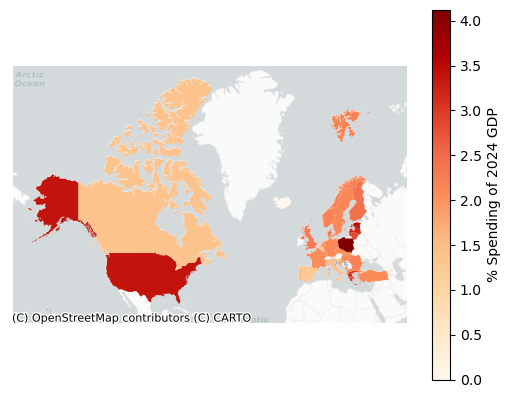

In [104]:
nato_clipped = nato.clip(polygon)

fig, ax = plt.subplots()
nato_clipped.plot(
    ax=ax,
    cmap="OrRd",
    legend=True,
    column="Spending",
    legend_kwds={"label": "% Spending of 2024 GDP", "orientation": "vertical"},
)
ax.set_axis_off()
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=nato_clipped.crs)
plt.show()

Text(0, 0.5, '% annual real change in gdp spending')

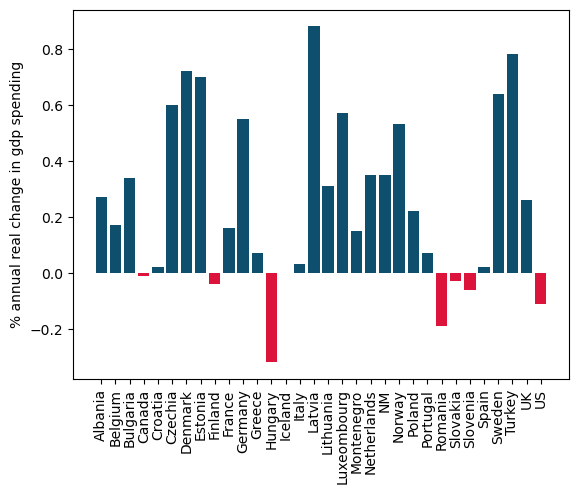

In [17]:
import numpy as np
change_spending_df = pd.read_csv('./data/change_spending.csv')
plt.bar(change_spending_df['Country'], change_spending_df['Spending 2024'] - change_spending_df['Spending 2023'],  color=np.where(change_spending_df['Spending 2024'] - change_spending_df['Spending 2023'] > 0, '#0E4F6D', 'crimson'))
plt.xticks(rotation=90)
plt.ylabel("% annual real change in gdp spending")